In [42]:
#!unzip -qq CVsD.zip

In [43]:
import os, shutil, pathlib

original_dir = pathlib.Path("./dataset/train/")
new_base_dir = pathlib.Path("./cats_vs_dogs_3000")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=3000)
make_subset("validation", start_index=3000, end_index=3500)
make_subset("test", start_index=3500, end_index=4000)

In [44]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [45]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                      

In [46]:
model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [47]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 6000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [48]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [49]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [50]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [51]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [52]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [53]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
188/188 [==============================] - 13s 50ms/step - loss: 0.6897 - accuracy: 0.5382 - val_loss: 0.6915 - val_accuracy: 0.5370
Epoch 2/30
188/188 [==============================] - 11s 56ms/step - loss: 0.6653 - accuracy: 0.5972 - val_loss: 0.6689 - val_accuracy: 0.5760
Epoch 3/30
188/188 [==============================] - 11s 56ms/step - loss: 0.6352 - accuracy: 0.6417 - val_loss: 0.5745 - val_accuracy: 0.6930
Epoch 4/30
188/188 [==============================] - 10s 54ms/step - loss: 0.5545 - accuracy: 0.7143 - val_loss: 0.4908 - val_accuracy: 0.7760
Epoch 5/30
188/188 [==============================] - 10s 53ms/step - loss: 0.5045 - accuracy: 0.7568 - val_loss: 0.5549 - val_accuracy: 0.7180
Epoch 6/30
188/188 [==============================] - 11s 52ms/step - loss: 0.4611 - accuracy: 0.7833 - val_loss: 0.4826 - val_accuracy: 0.7740
Epoch 7/30
188/188 [==============================] - 11s 55ms/step - loss: 0.4312 - accuracy: 0.7945 - val_loss: 0.4643 - val_accuracy:

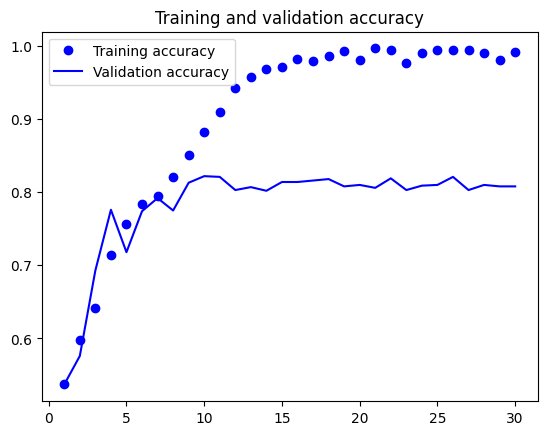

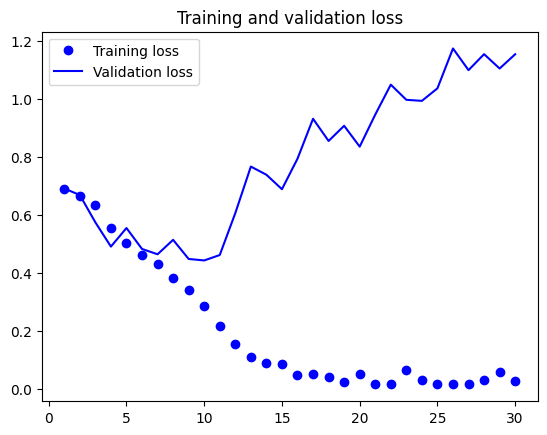

In [54]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [55]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 33ms/step - loss: 0.5770 - accuracy: 0.7780
Test accuracy: 0.778


In [56]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

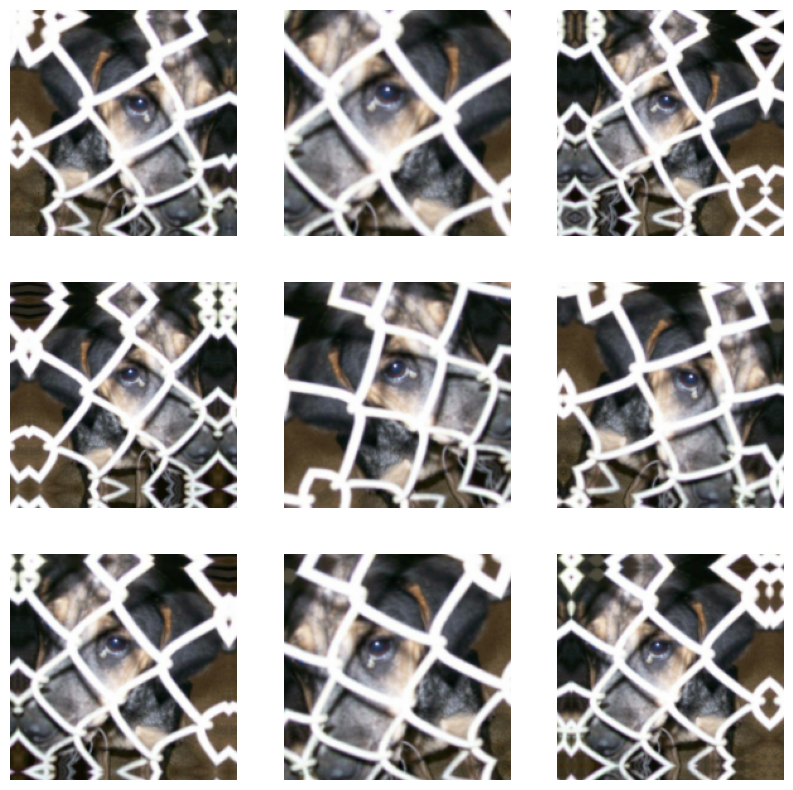

In [57]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [58]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [59]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
188/188 [==============================] - 14s 58ms/step - loss: 0.6916 - accuracy: 0.5183 - val_loss: 0.6762 - val_accuracy: 0.5230
Epoch 2/100
188/188 [==============================] - 11s 57ms/step - loss: 0.6857 - accuracy: 0.5337 - val_loss: 0.6681 - val_accuracy: 0.6050
Epoch 3/100
188/188 [==============================] - 11s 59ms/step - loss: 0.6729 - accuracy: 0.5685 - val_loss: 0.6621 - val_accuracy: 0.6390
Epoch 4/100
188/188 [==============================] - 10s 54ms/step - loss: 0.6578 - accuracy: 0.6077 - val_loss: 0.6494 - val_accuracy: 0.6310
Epoch 5/100
188/188 [==============================] - 11s 55ms/step - loss: 0.6390 - accuracy: 0.6322 - val_loss: 0.6111 - val_accuracy: 0.6540
Epoch 6/100
188/188 [==============================] - 11s 56ms/step - loss: 0.6030 - accuracy: 0.6748 - val_loss: 0.5895 - val_accuracy: 0.6870
Epoch 7/100
188/188 [==============================] - 11s 55ms/step - loss: 0.5813 - accuracy: 0.6890 - val_loss: 0.5746 - val_ac

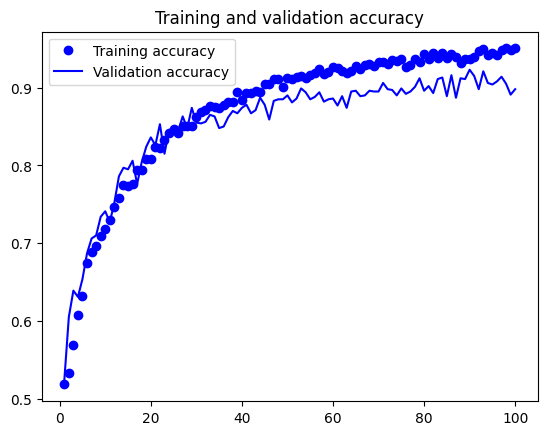

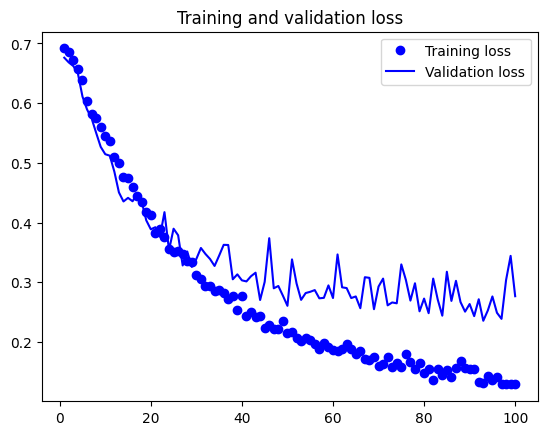

In [60]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [61]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 29ms/step - loss: 0.3369 - accuracy: 0.9060
Test accuracy: 0.906


In [62]:
conv_base = keras.applications.resnet_v2.ResNet152V2( 
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [63]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.inception_resnet_v2.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 61ms/step


In [64]:
train_features.shape

(6000, 6, 6, 2048)

In [65]:
inputs = keras.Input(shape=(6, 6, 2048))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
188/188 [==============================] - 5s 19ms/step - loss: 5.8368 - accuracy: 0.9725 - val_loss: 4.5443 - val_accuracy: 0.9800
Epoch 2/20
188/188 [==============================] - 2s 11ms/step - loss: 2.0938 - accuracy: 0.9887 - val_loss: 5.2259 - val_accuracy: 0.9840
Epoch 3/20
188/188 [==============================] - 2s 12ms/step - loss: 0.9923 - accuracy: 0.9935 - val_loss: 8.7346 - val_accuracy: 0.9770
Epoch 4/20
188/188 [==============================] - 3s 19ms/step - loss: 1.1559 - accuracy: 0.9933 - val_loss: 3.8781 - val_accuracy: 0.9870
Epoch 5/20
188/188 [==============================] - 2s 11ms/step - loss: 0.5306 - accuracy: 0.9965 - val_loss: 5.1361 - val_accuracy: 0.9810
Epoch 6/20
188/188 [==============================] - 2s 11ms/step - loss: 0.5919 - accuracy: 0.9977 - val_loss: 4.1642 - val_accuracy: 0.9860
Epoch 7/20
188/188 [==============================] - 2s 11ms/step - loss: 0.4303 - accuracy: 0.9977 - val_loss: 4.5348 - val_accuracy: 0.9840

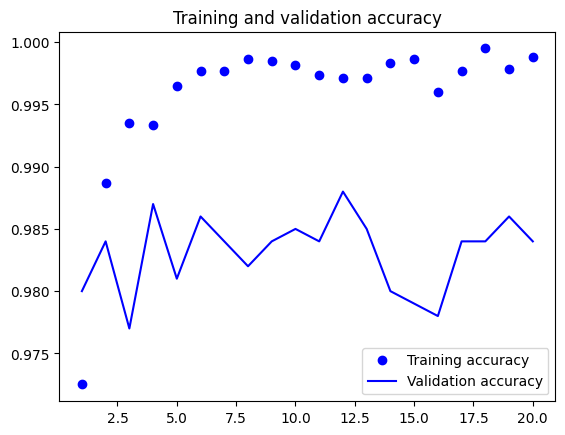

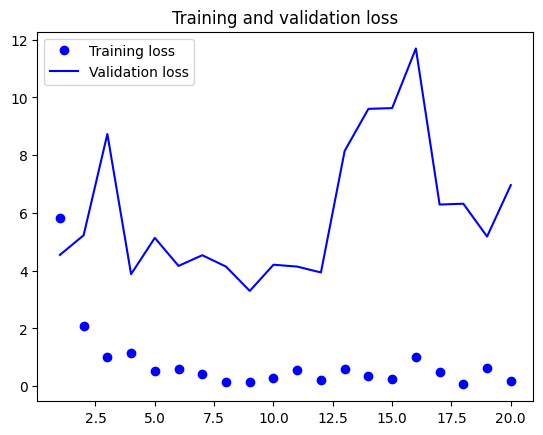

In [66]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [67]:
conv_base  = keras.applications.resnet_v2.ResNet152V2(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [68]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 512


In [69]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


In [70]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [71]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
188/188 [==============================] - 60s 260ms/step - loss: 10165.3623 - accuracy: 0.5318 - val_loss: 6865.9805 - val_accuracy: 0.5230
Epoch 2/50
188/188 [==============================] - 42s 223ms/step - loss: 4285.3857 - accuracy: 0.5673 - val_loss: 1315.9948 - val_accuracy: 0.6240
Epoch 3/50
188/188 [==============================] - 40s 211ms/step - loss: 2196.4221 - accuracy: 0.5860 - val_loss: 1445.4799 - val_accuracy: 0.5710
Epoch 4/50
188/188 [==============================] - 41s 218ms/step - loss: 1173.2375 - accuracy: 0.5882 - val_loss: 413.0420 - val_accuracy: 0.6440
Epoch 5/50
188/188 [==============================] - 46s 245ms/step - loss: 435.9774 - accuracy: 0.6000 - val_loss: 160.5340 - val_accuracy: 0.6480
Epoch 6/50
188/188 [==============================] - 47s 249ms/step - loss: 115.0942 - accuracy: 0.6052 - val_loss: 67.2202 - val_accuracy: 0.5840
Epoch 7/50
188/188 [==============================] - 42s 222ms/step - loss: 42.2624 - accuracy: 0.

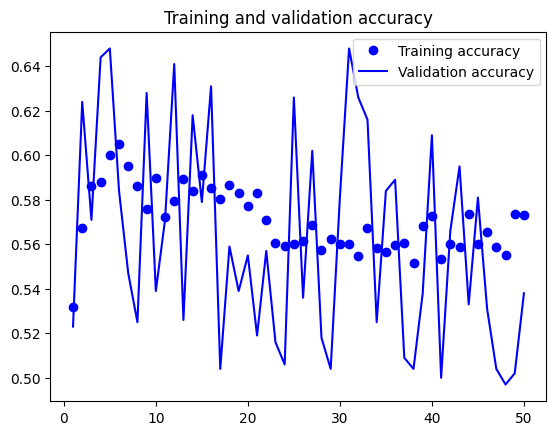

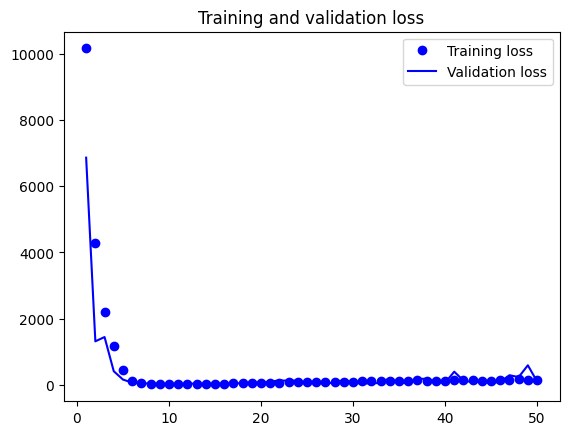

In [72]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [73]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 8s 164ms/step - loss: 12.6449 - accuracy: 0.5940
Test accuracy: 0.594


In [74]:
conv_base.summary()

Model: "resnet152v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_13[0][0]']               
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                     

In [75]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [76]:
from keras.optimizers import Adam

optimizer = Adam(lr=0.001)
model.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
188/188 [==============================] - 57s 242ms/step - loss: 0.8211 - accuracy: 0.5763 - val_loss: 0.7008 - val_accuracy: 0.6100
Epoch 2/30
188/188 [==============================] - 43s 228ms/step - loss: 0.6676 - accuracy: 0.6198 - val_loss: 0.6898 - val_accuracy: 0.6310
Epoch 3/30
188/188 [==============================] - 42s 220ms/step - loss: 0.6646 - accuracy: 0.6293 - val_loss: 0.6659 - val_accuracy: 0.5960
Epoch 4/30
188/188 [==============================] - 40s 211ms/step - loss: 0.6611 - accuracy: 0.6297 - val_loss: 0.7658 - val_accuracy: 0.5750
Epoch 5/30
188/188 [==============================] - 40s 211ms/step - loss: 0.6483 - accuracy: 0.6408 - val_loss: 0.9039 - val_accuracy: 0.6010
Epoch 6/30
188/188 [==============================] - 40s 210ms/step - loss: 0.6520 - accuracy: 0.6295 - val_loss: 0.6813 - val_accuracy: 0.6290
Epoch 7/30
188/188 [==============================] - 42s 223ms/step - loss: 0.6477 - accuracy: 0.6443 - val_loss: 0.6352 - val_ac

In [77]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 8s 164ms/step - loss: 0.6327 - accuracy: 0.6520
Test accuracy: 0.652
